# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={cities[i]}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | reggane
Processing Record 2 of Set 1 | kodinsk
Processing Record 3 of Set 1 | pervomaysk
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | aasiaat
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | acajutla
Processing Record 14 of Set 1 | feni
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | lalmonirhat
Processing Record 18 of Set 1 | gunjur
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | primero de mayo
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | beth

Processing Record 40 of Set 4 | port alfred
Processing Record 41 of Set 4 | pucheng
Processing Record 42 of Set 4 | saint-philippe
Processing Record 43 of Set 4 | lorengau
Processing Record 44 of Set 4 | quellon
Processing Record 45 of Set 4 | st. john's
Processing Record 46 of Set 4 | yelizovo
Processing Record 47 of Set 4 | pasni
Processing Record 48 of Set 4 | khandyga
Processing Record 49 of Set 4 | boende
Processing Record 0 of Set 5 | muisne
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | emerald
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | yeppoon
Processing Record 5 of Set 5 | pangody
Processing Record 6 of Set 5 | bairnsdale
Processing Record 7 of Set 5 | kapa'a
Processing Record 8 of Set 5 | nadym
Processing Record 9 of Set 5 | la paz
Processing Record 10 of Set 5 | mount gambier
Processing Record 11 of Set 5 | vila franca do campo
Processing Record 12 of Set 5 | wanning
Processing Record 13 of Set 5 | taoudenni
Processing Record

City not found. Skipping...
Processing Record 31 of Set 8 | jiazi
Processing Record 32 of Set 8 | camayenne
Processing Record 33 of Set 8 | raduzhny
Processing Record 34 of Set 8 | great falls
Processing Record 35 of Set 8 | copala
Processing Record 36 of Set 8 | luanda
Processing Record 37 of Set 8 | elliot lake
Processing Record 38 of Set 8 | castelli
Processing Record 39 of Set 8 | zahedan
Processing Record 40 of Set 8 | muana
Processing Record 41 of Set 8 | laayoune
Processing Record 42 of Set 8 | mahibadhoo
Processing Record 43 of Set 8 | katsuura
Processing Record 44 of Set 8 | duba
Processing Record 45 of Set 8 | den helder
Processing Record 46 of Set 8 | lubao
Processing Record 47 of Set 8 | kavaratti
Processing Record 48 of Set 8 | nuku'alofa
Processing Record 49 of Set 8 | mwinilunga
Processing Record 0 of Set 9 | yuzhno-kurilsk
Processing Record 1 of Set 9 | inhambane
Processing Record 2 of Set 9 | constantia
Processing Record 3 of Set 9 | puga
Processing Record 4 of Set 9 |

Processing Record 21 of Set 12 | takanabe
Processing Record 22 of Set 12 | zhangye
Processing Record 23 of Set 12 | ebon
Processing Record 24 of Set 12 | kristiansund
Processing Record 25 of Set 12 | guamal
Processing Record 26 of Set 12 | kalefeld
Processing Record 27 of Set 12 | heringen
Processing Record 28 of Set 12 | kavieng
Processing Record 29 of Set 12 | cadale
Processing Record 30 of Set 12 | haugesund
Processing Record 31 of Set 12 | sisimiut
Processing Record 32 of Set 12 | concepcion
Processing Record 33 of Set 12 | lauro de freitas
Processing Record 34 of Set 12 | figuig (centre)
Processing Record 35 of Set 12 | fort-shevchenko
Processing Record 36 of Set 12 | espargos
City not found. Skipping...
Processing Record 37 of Set 12 | oranjemund
Processing Record 38 of Set 12 | oppdal
Processing Record 39 of Set 12 | kingston
Processing Record 40 of Set 12 | akureyri
Processing Record 41 of Set 12 | east london
Processing Record 42 of Set 12 | zouerate
Processing Record 43 of Se

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,reggane,26.7158,0.1714,295.32,19,1,3.87,DZ,1705165081
1,kodinsk,58.6881,99.1844,259.59,94,100,3.37,RU,1705165081
2,pervomaysk,48.0443,30.8507,270.72,96,99,3.85,UA,1705165081
3,ushuaia,-54.8000,-68.3000,281.96,53,75,11.83,AR,1705164796
4,port-aux-francais,-49.3500,70.2167,280.76,93,94,13.47,TF,1705165082


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,reggane,26.7158,0.1714,295.32,19,1,3.87,DZ,1705165081
1,kodinsk,58.6881,99.1844,259.59,94,100,3.37,RU,1705165081
2,pervomaysk,48.0443,30.8507,270.72,96,99,3.85,UA,1705165081
3,ushuaia,-54.8000,-68.3000,281.96,53,75,11.83,AR,1705164796
4,port-aux-francais,-49.3500,70.2167,280.76,93,94,13.47,TF,1705165082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

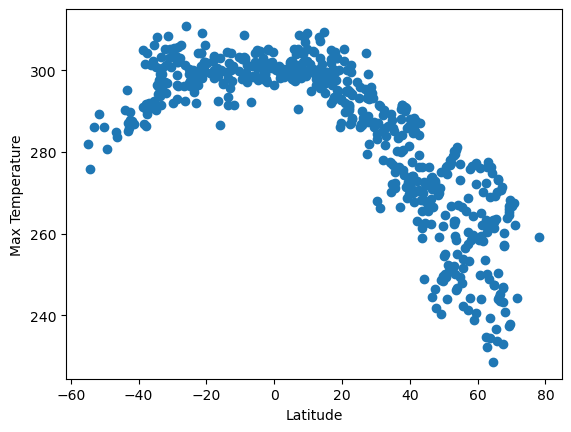

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

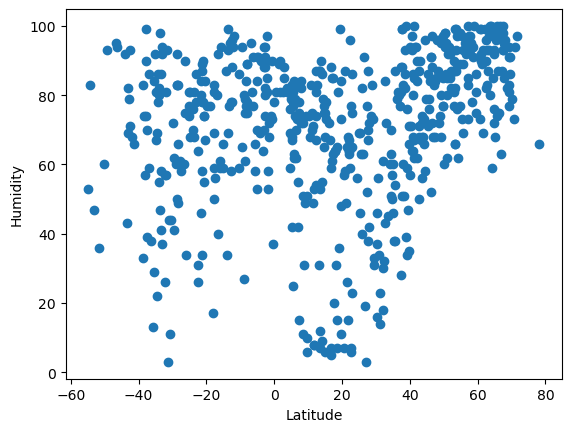

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

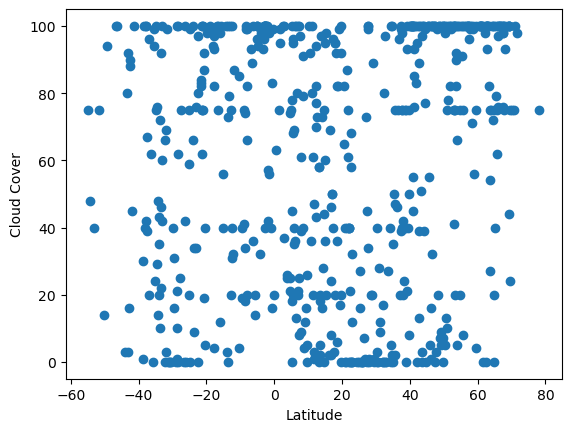

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.ylabel('Cloud Cover')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

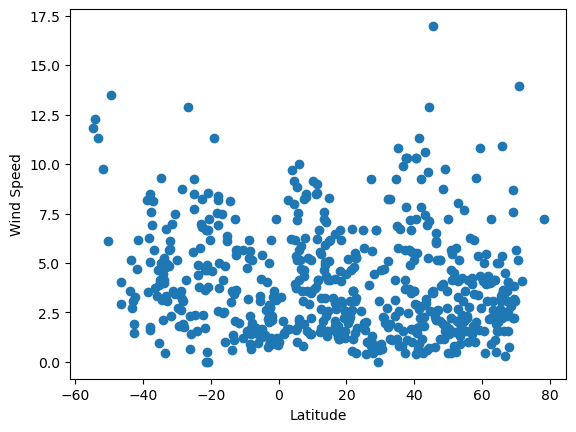

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.loc[city_data_df['Lat']>=0, :]

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,reggane,26.7158,0.1714,295.32,19,1,3.87,DZ,1705165081
1,kodinsk,58.6881,99.1844,259.59,94,100,3.37,RU,1705165081
2,pervomaysk,48.0443,30.8507,270.72,96,99,3.85,UA,1705165081
7,aasiaat,68.7098,-52.8699,263.84,82,100,2.82,GL,1705165083
10,tiksi,71.6872,128.8694,244.23,97,98,4.08,RU,1705165083


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.loc[city_data_df['Lat']<0, :]
# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ushuaia,-54.8000,-68.3000,281.96,53,75,11.83,AR,1705164796
4,port-aux-francais,-49.3500,70.2167,280.76,93,94,13.47,TF,1705165082
5,grytviken,-54.2811,-36.5092,275.86,83,48,12.29,GS,1705165082
6,invercargill,-46.4000,168.3500,283.72,94,100,4.02,NZ,1705165082
8,waitangi,-43.9535,-176.5597,290.27,92,3,3.58,NZ,1705165083


###  Temperature vs. Latitude Linear Regression Plot

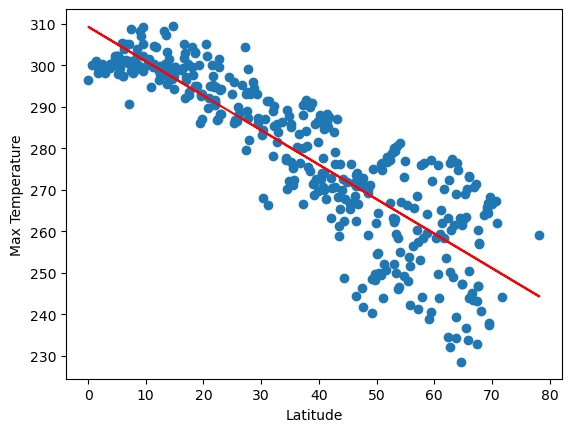

In [17]:
# Linear regression on Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Max Temp']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
north_line = x_values * wea_slp + wea_intr
plt.plot(x_values, north_line, 'r-')
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Max Temp'])
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.show()

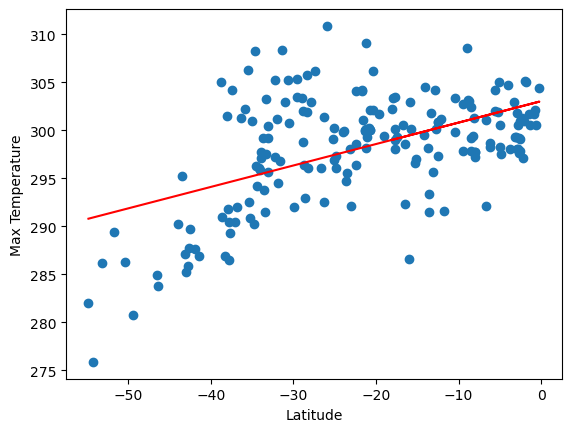

In [18]:
# Linear regression on Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Max Temp']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
south_line = x_values * wea_slp + wea_intr
plt.plot(x_values, south_line, 'r-')
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Max Temp'])
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** As the latitude gets closer to 0 the higher the temperature. 0 latitude means that you are on the equator. Showing the northern and southern hemisphere shows how each city is colder the farther away it is from 0 latitude. The negative or positive correlation is explaining which direction the city is located from the equator.

### Humidity vs. Latitude Linear Regression Plot

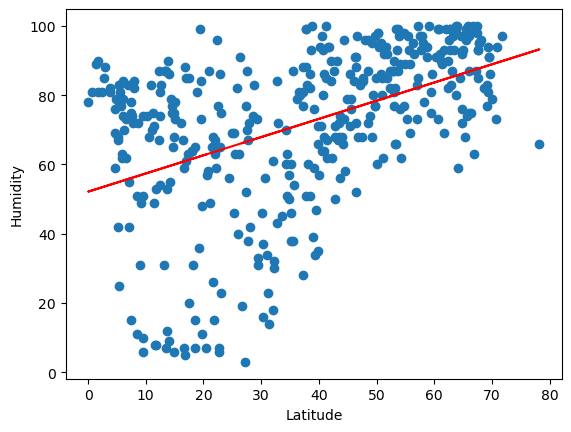

In [19]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
north_line = x_values * wea_slp + wea_intr
plt.plot(x_values, north_line, 'r-')
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

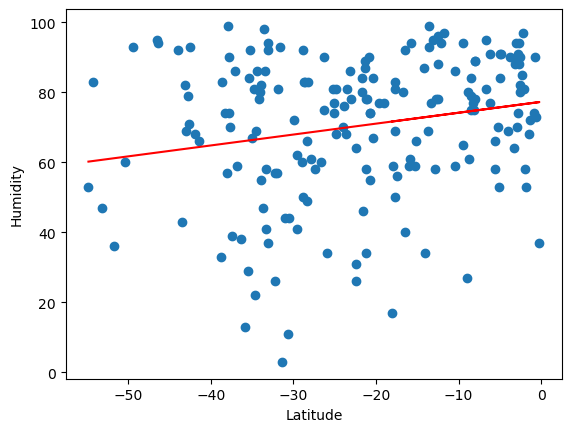

In [20]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
south_line = x_values * wea_slp + wea_intr
plt.plot(x_values, south_line, 'r-')
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Humidity'])
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** Both lines have a positive relationship. Although small, the plots communicate that the higher the longitude the higher the humidity. There are more concentrated groups of cities with higher humidity at the higher latitudes. 

### Cloudiness vs. Latitude Linear Regression Plot

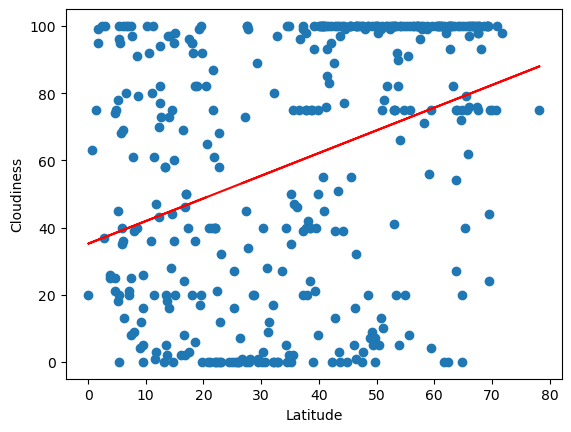

In [27]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
north_line = x_values * wea_slp + wea_intr
plt.plot(x_values, north_line, 'r-')
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

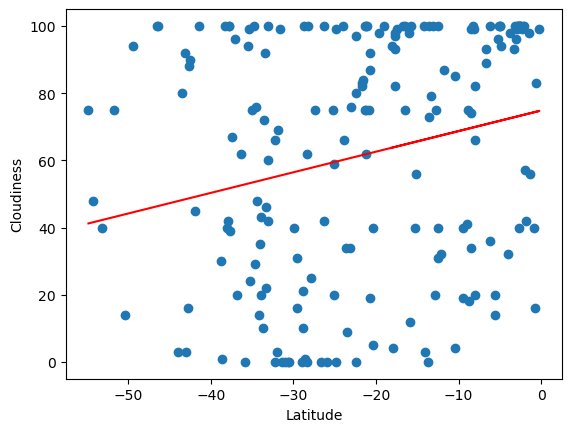

In [26]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
south_line = x_values * wea_slp + wea_intr
plt.plot(x_values, south_line, 'r-')
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Cloudiness'])
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** The lines on these plots show a similar trend as the humidity plots did. However the points on these are so much more spread out from eachother. Points that are very similar latitude have opposite cloudiness levels. In both the northern and southern hemisphere the cloudiness levels only go to about 80. It's like the cloudiness resets when crossing the equator which doesn't make any sense.

### Wind Speed vs. Latitude Linear Regression Plot

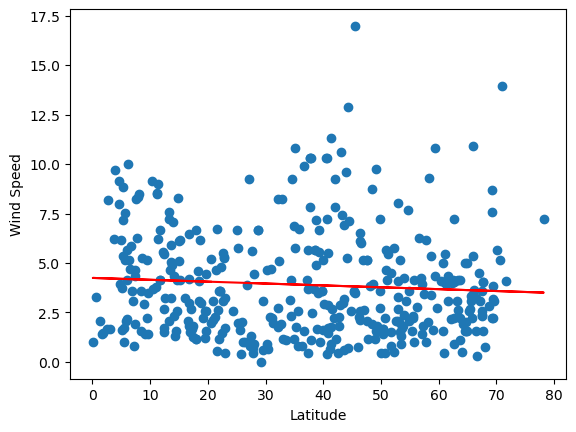

In [30]:
# Northern Hemisphere
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind Speed']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
north_line = x_values * wea_slp + wea_intr
plt.plot(x_values, north_line, 'r-')
plt.scatter(north_hemi_df['Lat'], north_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

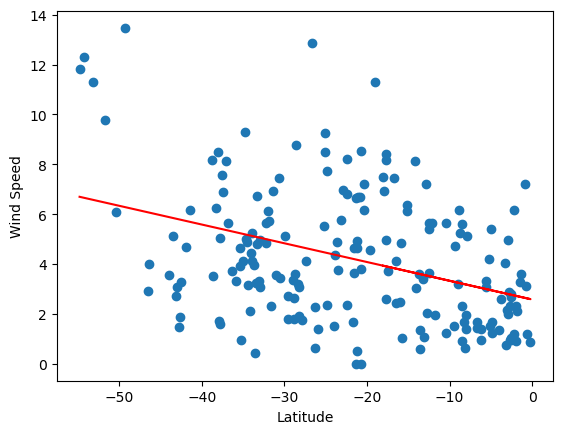

In [31]:
# Southern Hemisphere
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind Speed']
wea_slp, wea_intr, wea_r, wea_p, wea_stderr = linregress(x_values, y_values)
south_line = x_values * wea_slp + wea_intr
plt.plot(x_values, south_line, 'r-')
plt.scatter(south_hemi_df['Lat'], south_hemi_df['Wind Speed'])
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.show()

**Discussion about the linear relationship:** The northern hemisphere plot shows almost a flat line meaning there is no relationship between the wind speed and latitude. In the southern hemisphere the wind speed decreases the closer we are to the equator. The south pole must be a lot windier than the north. At least according to these randomly selected cities.